## Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


## Reading the csv file

In [2]:
df = pd.read_csv("ORG_ATTRITION_DATA.csv")

## Label Encoding

In [3]:
#using the label encoding technique to convert categorical data into numerical
my_label = preprocessing.LabelEncoder()
df['BusinessTravel'] = my_label.fit_transform(df['BusinessTravel'])
df['Department'] = my_label.fit_transform(df['Department'])
df['EducationField'] = my_label.fit_transform(df['EducationField'])
df['Gender'] = my_label.fit_transform(df['Gender'])
df['JobRole'] = my_label.fit_transform(df['JobRole'])
df['MaritalStatus'] = my_label.fit_transform(df['MaritalStatus'])
df['Over18'] = my_label.fit_transform(df['Over18'])
df['OverTime'] = my_label.fit_transform(df['OverTime'])
df['Attrition'] = my_label.fit_transform(df['Attrition'])

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,25.0,0,2,1,1,1,350,1,0,62,...,0,3,4,5,3,3,4,2,1,2
1,49.0,1,1,1,28,1,1420,1,1,97,...,0,4,1,20,2,3,4,3,1,3
2,29.0,0,2,1,29,1,1859,4,1,93,...,0,3,4,11,3,3,7,0,1,6
3,26.0,0,2,2,23,2,72,3,0,47,...,1,3,3,5,2,2,2,2,0,0
4,34.0,0,2,1,6,4,138,1,0,41,...,0,3,3,16,3,3,16,13,2,10


## Defining X and y

In [5]:
X = df.drop(columns = "Attrition") #dropped Attrition as it is a target variable
y = df["Attrition"]

In [6]:
X

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,25.0,2,1,1,1,350,1,0,62,3,...,0,3,4,5,3,3,4,2,1,2
1,49.0,1,1,28,1,1420,1,1,97,2,...,0,4,1,20,2,3,4,3,1,3
2,29.0,2,1,29,1,1859,4,1,93,1,...,0,3,4,11,3,3,7,0,1,6
3,26.0,2,2,23,2,72,3,0,47,2,...,1,3,3,5,2,2,2,2,0,0
4,34.0,2,1,6,4,138,1,0,41,3,...,0,3,3,16,3,3,16,13,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,26.0,2,1,25,1,55,1,1,48,1,...,0,3,3,1,2,2,1,0,0,1
1246,48.0,2,1,4,1,1363,4,1,54,3,...,0,3,3,11,2,3,10,9,0,8
1247,29.0,2,1,6,3,1192,2,0,54,3,...,0,3,1,10,5,3,10,8,0,8
1248,35.0,2,2,1,2,204,3,1,94,3,...,0,3,1,10,3,3,10,8,0,6


In [7]:
y

0       0
1       1
2       0
3       0
4       0
       ..
1245    1
1246    0
1247    0
1248    0
1249    0
Name: Attrition, Length: 1250, dtype: int32

## Training and Testing

In [8]:
#training and testing of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test; 80% train

## Standardizing data

In [10]:
#standardising data with the help of z-score(mean=0; std dev = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit_transform = fit() and transform()
#fit() calculates mean and std dev ;  tranform() used to transform data
X_test = scaler.transform(X_test) #for test datatset, no need to apply fit() as ML applies prediction based on training dataset to calc mean & std dev

## Logistic Regression

In [11]:
#regression
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

## Confusion Matrix

In [12]:
#confusion matrix(used to evaluate logistic regression model)
c_matrix = metrics.confusion_matrix(y_test,y_pred)
c_matrix

array([[201,   7],
       [ 30,  12]], dtype=int64)

<module 'matplotlib.pyplot' from 'C:\\Users\\nv\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

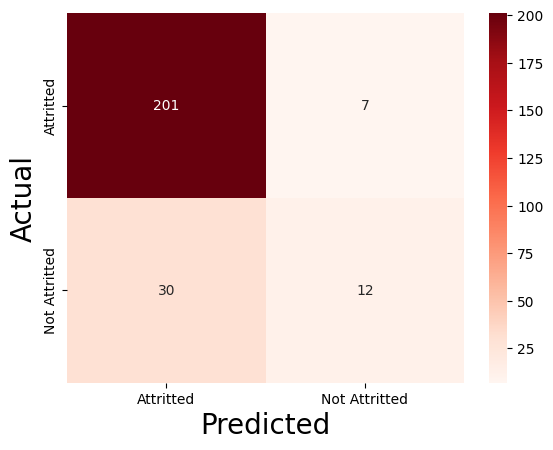

In [13]:

sns.heatmap(c_matrix, annot=True,cmap = "Reds",fmt='g',xticklabels=["Attritted","Not Attritted"],yticklabels=["Attritted","Not Attritted"])
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt

In [29]:
print(classification_report(y_test, y_pred, target_names=["Attritted","Not Attritted"]))

               precision    recall  f1-score   support

    Attritted       0.87      0.97      0.92       208
Not Attritted       0.63      0.29      0.39        42

     accuracy                           0.85       250
    macro avg       0.75      0.63      0.65       250
 weighted avg       0.83      0.85      0.83       250



In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

85.2